In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras import layers, models, losses, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import os

data = "/content/gdrive/MyDrive/Colab Notebooks/Hackathon Data"
labels = os.listdir(data)

print(len(labels))

11


In [5]:
train_path = "/content/gdrive/MyDrive/Colab Notebooks/Hackathon Data"
val_path = "/content/gdrive/MyDrive/Colab Notebooks/Test Data"

In [6]:
shear = 0.3
rotat = 20
w_shift = 0.4
h_shift = 0.4
zoom = 0.2

In [7]:
train_batches = ImageDataGenerator(zoom_range=zoom, rotation_range=rotat, shear_range=shear, 
width_shift_range=w_shift, height_shift_range=h_shift, horizontal_flip=True, fill_mode='nearest', 
preprocessing_function=tf.keras.applications.vgg16.preprocess_input, rescale=1/255)\
.flow_from_directory(directory=train_path, target_size=(224, 224), classes=labels, batch_size=10)

val_batches = ImageDataGenerator(zoom_range=zoom, rotation_range=rotat, shear_range=shear, 
width_shift_range=w_shift, height_shift_range=h_shift, horizontal_flip=True, fill_mode='nearest', 
preprocessing_function=tf.keras.applications.vgg16.preprocess_input,  rescale=1/255)\
.flow_from_directory(directory=val_path, target_size=(224, 224), classes=labels, batch_size=10)

Found 6342 images belonging to 11 classes.
Found 520 images belonging to 11 classes.


In [8]:
img, labels = next(train_batches)

In [9]:
def plt_imgs(img_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

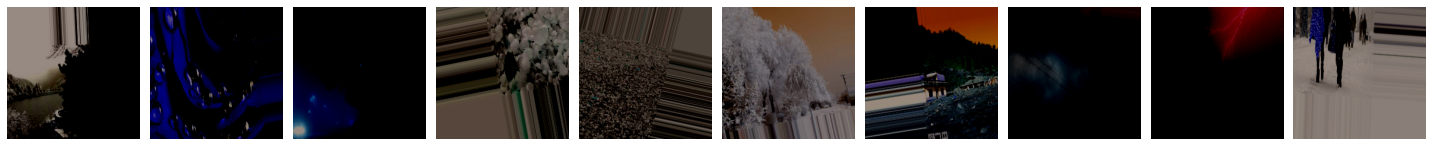

In [10]:
plt_imgs(img)

In [11]:
print(labels)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [12]:
from tensorflow.keras import datasets, layers, models, losses, Model
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout


In [13]:
base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in base_model.layers:
  layer.trainable=False

58900480/58889256 [==============================] - 0s 0us/step


In [14]:
# x = layers.Flatten()(base_model.output)

# x = layers.Dense(512, activation='relu')(x)
# predictions = layers.Dense(4, activation = 'softmax')(x)

# 

x = tf.keras.layers.Flatten()(base_model.output)

x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)
x = tf.keras.layers.Dense(100, activation='relu')(x)

predictions = tf.keras.layers.Dense(11, activation='softmax')(x)


full_model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)
full_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
from tensorflow.python.eager.def_function import functions_run_eagerly
# head_model = Model(inputs = base_model.input, outputs = predictions)
# model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=["sparse_categorical_accuracy"])
full_model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkp = ModelCheckpoint('weather_model.h5', monitor='val_accuracy', min_delta=0, mode='max', patience=0, verbose=1, save_best_only=True)
# early_s = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=0, verbose=1, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=0,  verbose=1, min_delta=0.0001)

callback = [checkp]

In [ ]:
epoch = 20
hist = full_model.fit(x=train_batches, validation_data=val_batches, callbacks=callback, verbose=1, epochs= epoch, batch_size=10)

Epoch 1/100
170/635 [=======>......................] - ETA: 21:03 - loss: 2.1773 - accuracy: 0.2065

In [ ]:
hist.history.keys()

In [ ]:
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])

In [ ]:
val_batches.class_indices


In [ ]:
t_imgs, t_label = next(val_batches)
plt_imgs(t_imgs)
print(t_label)

In [ ]:
import numpy as np
predictions = full_model.predict(x=val_batches, verbose=0)
print(np.round(predictions))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn 

tick_labels = ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow'] 
cm = confusion_matrix(y_true=val_batches.classes, y_pred=np.argmax(predictions, axis=-1))
sn.heatmap(cm, annot=True, cmap="Greens", xticklabels=tick_labels, yticklabels=tick_labels)
plt.title("Confusion Matrix for Weather Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
full_model.save("/content/final_pests_82%.h5")
full_model.save_weights("/content/final_pests_82%.pt")